# One-sample training

In [203]:
import pandas as  pd
import numpy as np

df = pd.read_csv(r'D:\Study\AIO\Content\Linear Regression\advertising.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


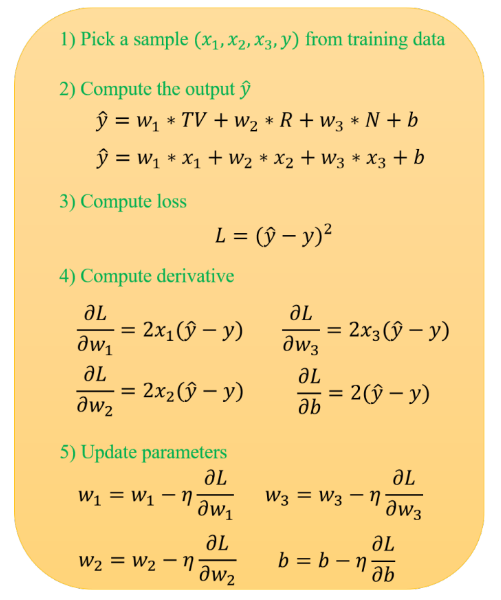

## 1. Prepare data

In [209]:
def prepare_data (df) :
    tv_data = df.loc[:, 'TV'].to_numpy()
 
    radio_data = df.loc[:, 'Radio'].to_numpy()

    newspaper_data = df.loc[:, 'Newspaper'].to_numpy()
    
    sales_data = df.loc[:, 'Sales'].to_numpy()

    X_data = [ tv_data , radio_data , newspaper_data ]
    y_data = sales_data
    
    return X , y

In [537]:
X_data , y_data = prepare_data (df)
list = [ sum(X_data[0][:5]) , sum (X_data[1][:5]) , sum(X_data[2][:5]) , sum (y_data[:5]) ]
list

[624.1, 175.10000000000002, 300.5, 78.9]

In [213]:
np.array(X_data).shape

(3, 200)

In [215]:
len(df)

200

## 2. Predict y_hat

In [522]:
def initialize_params():
    bias = 0
    w1 = random . gauss ( mu =0.0 , sigma =0.01)
    w2 = random . gauss ( mu =0.0 , sigma =0.01)
    w3 = random . gauss ( mu =0.0 , sigma =0.01)
    
    w1, w2, w3, b =  (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344 , 0)
    # w1, w2, w3, b = [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    return w1, w2, w3, b

In [524]:
def predict ( x1 , x2 , x3 , w1 , w2 , w3 , b ) :
    return w1 * x1 + w2 * x2 + w3 * x3 + b

In [221]:
y_predicted = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print (y_predicted)

1.0


## 3. Compute loss

In [526]:
def compute_loss_mse(y_hat, y ):  # MSE = Mean Square Error
    return np.power((y_hat - y), 2)

In [226]:
l = compute_loss_mse( y_hat=1 , y=0.5) 
print (l)

0.25


## 4. Comput derivatives for w[i]

In [528]:
def compute_gradient_wi (xi , y , y_hat ) :
    return 2 * xi * (y_hat - y)

In [231]:
g_wi = compute_gradient_wi ( xi=1.0 , y=1.0 , y_hat =0.5)
print ( g_wi )

-1.0


## 5. Compute derivative for b

In [530]:
def compute_gradient_b (y , y_hat ) :
    return 2 * (y_hat - y)

In [236]:
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-3.0


## 6. Update weights

In [532]:
def update_weight_wi ( wi , dl_dwi , lr ) :
    return wi - lr * dl_dwi

In [241]:
after_wi = update_weight_wi ( wi =1.0 , dl_dwi = -0.5 , lr = 1e-5)
print ( after_wi )

1.000005


## 7. Update bias

In [534]:
def update_weight_b (b , dl_db, lr ):
    return b - lr * dl_db 

In [158]:
after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr = 1e-5)
print ( after_b )

0.50001


## 8. Implement linear regression

In [248]:
def implement_linear_regression (X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict( x1 , x2 , x3 , w1 , w2 , w3 , b)

            # compute loss
            loss = compute_loss_mse(y_hat, y)

            # compute gradient w1 , w2 , w3 , b 
            dl_dw1 = compute_gradient_wi ( x1 , y , y_hat )
            dl_dw2 = compute_gradient_wi ( x2 , y , y_hat )
            dl_dw3 = compute_gradient_wi ( x3 , y , y_hat )
            dl_db = compute_gradient_b (y , y_hat )

            # update parameters
            w1 = update_weight_wi ( w1 , dl_dw1 , lr )
            w2 = update_weight_wi ( w2 , dl_dw2 , lr )
            w3 = update_weight_wi ( w3 , dl_dw3 , lr )
            b = update_weight_b ( b , dl_db , lr )

            losses.append ( loss )
    return ( w1 , w2 , w3 ,b , losses )

In [258]:
w1 , w2 , w3 ,b , losses = implement_linear_regression (X, y, epoch_max=50, lr=1e-5)

## Visualize Losses

Text(0, 0.5, ' Loss ')

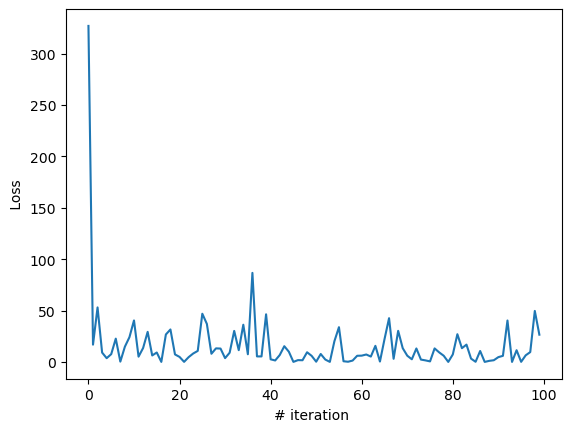

In [254]:
import  matplotlib.pyplot as plt

plt.plot( losses[:100])
plt.xlabel ("# iteration ")
plt.ylabel (" Loss ")

## Print weights

In [256]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X_data , y_data )
print ( w1 , w2 , w3 )

0.07405984066396477 0.15917360263437663 0.017561197559948935


## Predicted new value

In [272]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)

# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f'predicted sales is { sales }')

predicted sales is 8.176413319549823


## Compute loss MAE (Mean Absolute Error)

In [299]:
def compute_loss_mae ( y_hat, y):
    return np.mean(np.fabs(y_hat - y))

In [301]:
l = compute_loss_mae ( y_hat =1 , y =0.5)
print ( l )

0.5


# Batch Training

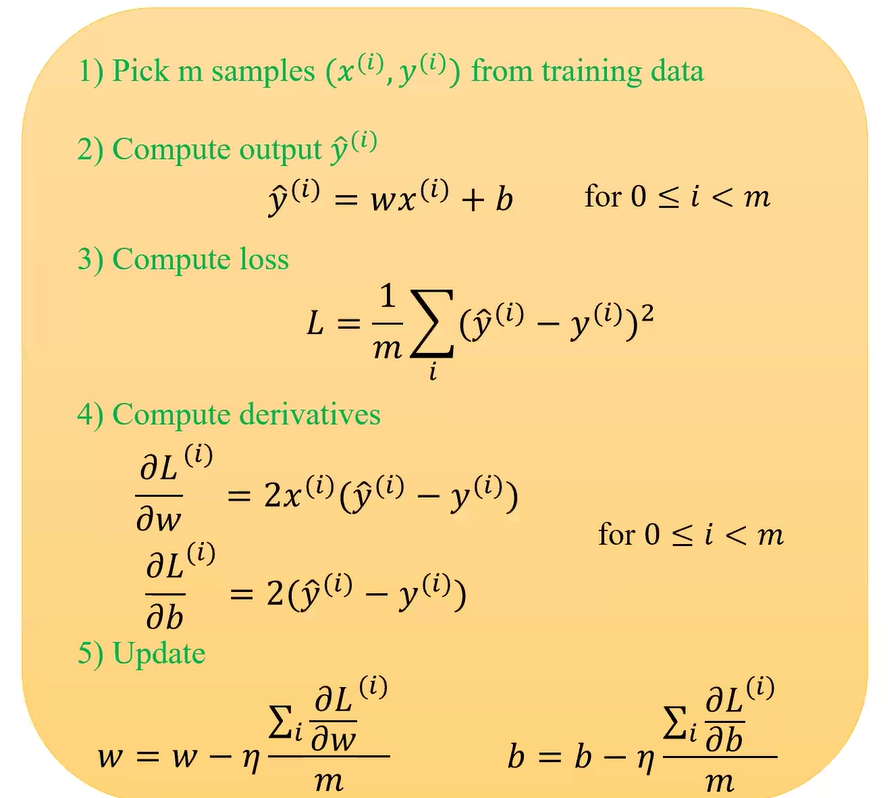

In [466]:
def implement_linear_regression_m_samples ( X_data , y_data , m=64 , epoch_max =50 , lr=1e-5) :
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(0, N, m):
            loss_batch = []
            dl_dw1_batch = []
            dl_dw2_batch = []
            dl_dw3_batch = []
            dl_db_batch = []
            
            for j in range(m):
                if (i + j) < N:
                    x1 = X_data[0][i+j]
                    x2 = X_data[1][i+j]
                    x3 = X_data[2][i+j]
                    
                    y = y_data[i+j]
                    y_hat = predict( x1 , x2 , x3 , w1 , w2 , w3 , b)
                    loss_sample = compute_loss_mse(y_hat, y)
                    loss_batch.append(loss_sample)
        
                    dl_dw1 = compute_gradient_wi(x1, y, y_hat)
                    dl_dw2 = compute_gradient_wi(x2, y, y_hat)
                    dl_dw3 = compute_gradient_wi(x3, y, y_hat)
                    dl_db = compute_gradient_b(y, y_hat)
    
                    dl_dw1_batch.append(dl_dw1)
                    dl_dw2_batch.append(dl_dw2)
                    dl_dw3_batch.append(dl_dw3)
                    dl_db_batch.append(dl_db)
                
            dw1 = np.mean(dl_dw1_batch) 
            dw2 = np.mean(dl_dw2_batch) 
            dw3 = np.mean(dl_dw3_batch)
            db = np.mean(dl_db_batch) 

            loss = np.mean(loss_batch) 
            losses.append(loss)
            
            w1 = update_weight_wi ( w1 , dw1 , lr )
            w2 = update_weight_wi ( w2 , dw2 , lr )
            w3 = update_weight_wi ( w3 , dw3 , lr )
            b = update_weight_b ( b , db , lr )
            
    return ( w1 , w2 , w3 , b , losses )

In [480]:
def implement_linear_regression_n_samples ( X_data , y_data , epoch_max =50 , lr=1e-5) :
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(0, N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            y_hat = predict( x1 , x2 , x3 , w1 , w2 , w3 , b)
            loss_sample = compute_loss_mse(y_hat, y)
            loss_total = loss_total + loss_sample
            
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            dw1_total = dw1_total + dl_dw1
            dw2_total = dw2_total + dl_dw2
            dw3_total = dw3_total + dl_dw3
            db_total = db_total + dl_db
            
    
        dw1_total = dw1_total / N
        dw2_total = dw2_total / N   
        dw3_total = dw3_total / N   
        db_total = db_total / N

        loss_total = loss_total / N
        losses.append(loss_total)
        
        w1 = update_weight_wi ( w1 , dw1_total , lr )
        w2 = update_weight_wi ( w2 , dw2_total , lr )
        w3 = update_weight_wi ( w3 , dw3_total , lr )
        b = update_weight_b ( b , db_total , lr )
            
    return ( w1 , w2 , w3 , b , losses )

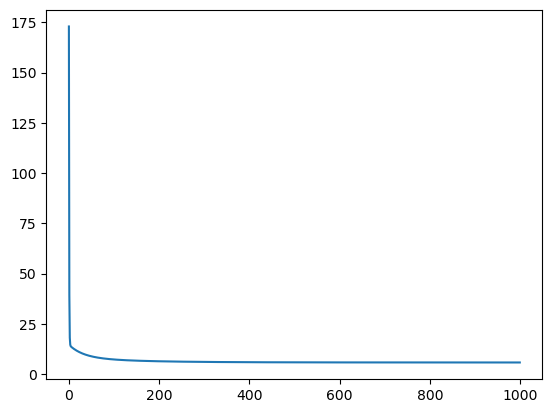

In [488]:
w1 , w2 , w3 ,b , losses = implement_linear_regression_n_samples ( X_data , y_data , epoch_max =1000 , lr=1e-5)
plt.plot(losses)

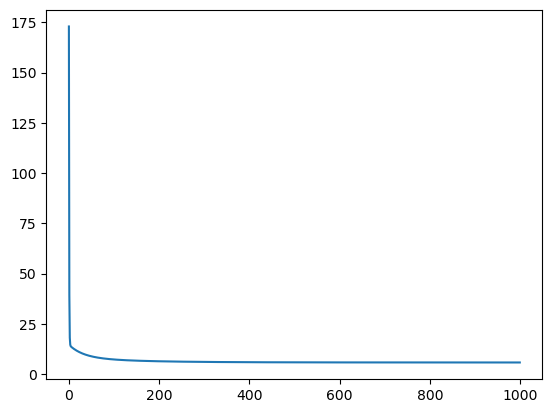

In [492]:
w1 , w2 , w3 ,b , losses  = implement_linear_regression_m_samples(X , y , m=200, epoch_max =1000 , lr =1e-5)
plt.plot(losses)

In [494]:
w1 , w2 , w3

(0.06710990754044266, 0.15756173831487585, 0.029619799386084403)

In [520]:
np.array(X_data)[:, 0]

array([230.1,  37.8,  69.2])

## Question 12: Refactor

In [592]:
import random

def initialize_params():
    bias = 0
    w1 = random.gauss( mu =0.0 , sigma =0.01)
    w2 = random.gauss( mu =0.0 , sigma =0.01)
    w3 = random.gauss( mu =0.0 , sigma =0.01)
    
    b, w1, w2, w3  = [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    return [b, w1, w2, w3]

In [594]:
def prepare_data_2(df) :
    tv_data = df.loc[:, 'TV'].to_numpy()
    radio_data = df.loc[:, 'Radio'].to_numpy()
    newspaper_data = df.loc[:, 'Newspaper'].to_numpy()
    sales_data = df.loc[:, 'Sales'].to_numpy()

    X = [[1 , x1 , x2 , x3 ] for x1 , x2 , x3 in zip( tv_data , radio_data , newspaper_data ) ]
    y_data = sales_data
    
    return X , y

In [598]:
X_data , y_data = prepare_data_2(df)

In [606]:
len(X_data)

200

In [608]:
def predict(X_features, weights): # X_features = [1, x1, x2, x3] ; Weights = [b, w1, w2, w3]
    return np.dot(X_features, weights)

In [610]:
def compute_loss_mse(y_hat, y ):  # MSE = Mean Square Error
    return np.power((y_hat - y), 2)

In [636]:
def compute_gradient_weights ( X_features, y , y_hat ):
    return 2 * np.array(X_features) * (y_hat - y)

In [626]:
def update_weights (weights, dl_dweights, lr) :
    return weights - lr * dl_dweights

In [630]:
def implement_linear_regression (X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            X_features = X_data[i]
            y = y_data[i]

            y_hat = predict(X_features, weights)

            loss = compute_loss_mse(y_hat, y)
            losses.append ( loss )

            dl_dweights = compute_gradient_weights ( X_features , y , y_hat )
            weights = update_weights(weights, dl_dweights, lr)
            
    return (weights , losses)

In [638]:
W , L = implement_linear_regression (X_data, y_data)

Text(0, 0.5, 'Loss')

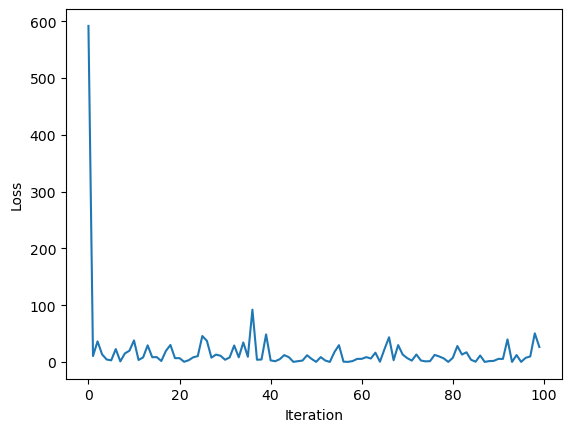

In [642]:
plt.plot (L[0:100])
plt.xlabel('Iteration')
plt.ylabel("Loss")

In [644]:
print(L[9999])

31.33922340810991
